In [74]:
import pandas as pd
import numpy as np

# Librerias de visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv('CrabAgePrediction.csv')
df.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,F,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9
1,M,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6
2,I,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6
3,F,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10
4,I,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [65]:
df.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [77]:
df.Sex.unique().tolist()

['F', 'M', 'I']

In [78]:
df.Sex.value_counts()

Sex
M    1435
I    1233
F    1225
Name: count, dtype: int64

In [94]:
df1 = df
df1 = pd.get_dummies(data = df, columns = ['Sex'])

df1.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,1.4375,1.1750,0.4125,24.635715,12.332033,5.584852,6.747181,9,True,False,False
1,0.8875,0.6500,0.2125,5.400580,2.296310,1.374951,1.559222,6,False,False,True
2,1.0375,0.7750,0.2500,7.952035,3.231843,1.601747,2.764076,6,False,True,False
3,1.1750,0.8875,0.2500,13.480187,4.748541,2.282135,5.244657,10,True,False,False
4,0.8875,0.6625,0.2125,6.903103,3.458639,1.488349,1.700970,6,False,True,False


In [95]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          3893 non-null   float64
 1   Diameter        3893 non-null   float64
 2   Height          3893 non-null   float64
 3   Weight          3893 non-null   float64
 4   Shucked Weight  3893 non-null   float64
 5   Viscera Weight  3893 non-null   float64
 6   Shell Weight    3893 non-null   float64
 7   Age             3893 non-null   int64  
 8   Sex_F           3893 non-null   bool   
 9   Sex_I           3893 non-null   bool   
 10  Sex_M           3893 non-null   bool   
dtypes: bool(3), float64(7), int64(1)
memory usage: 254.8 KB


# Encontrar correlacion o multiconlinealidad entre las variables

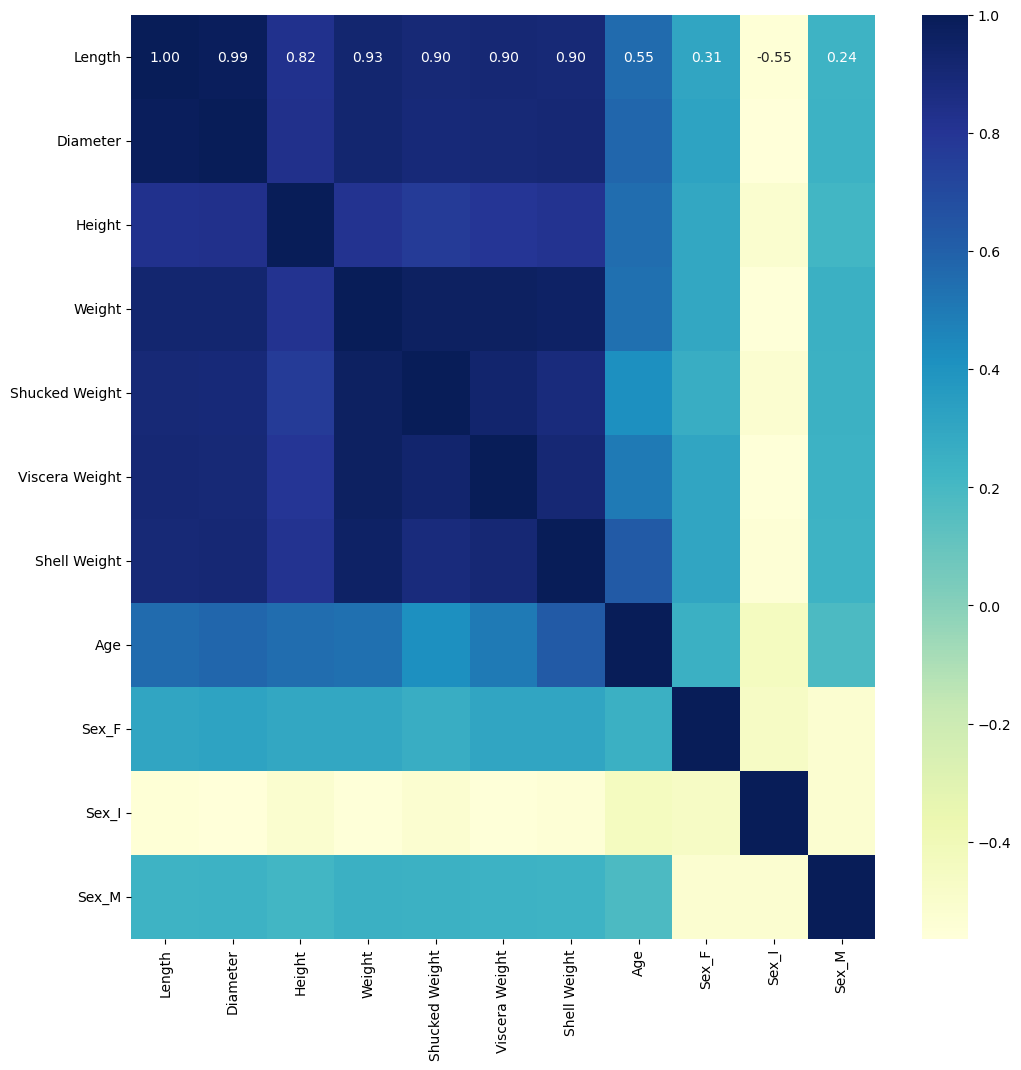

In [109]:

#plt.figure(figsize=(18, 18))
#sns.heatmap(df1.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
#plt.show()

plt.figure(figsize = (12, 12)) 
sns.heatmap(df1.corr(), annot = True, cmap="YlGnBu", fmt='.2f')
plt.show()

In [104]:
correlations = df1.corr()['Age'].drop('Age').sort_values(ascending=False)
print(correlations)

Shell Weight      0.625195
Diameter          0.573844
Length            0.554973
Height            0.551956
Weight            0.538819
Viscera Weight    0.501328
Shucked Weight    0.418760
Sex_F             0.249282
Sex_M             0.182339
Sex_I            -0.437937
Name: Age, dtype: float64


# Creación del modelo de regression lineal

In [105]:
correlated_cols = ['Shell Weight', 'Diameter', 'Length', 'Height', 'Weight', 'Viscera Weight', 'Shucked Weight', 'Sex_F', 'Sex_M', 'Sex_I']

In [ ]:
from sklearn.impor